# Checkpoint Two: Exploratory Data Analysis

Now that your chosen dataset is approved, it is time to start working on your analysis. Use this notebook to perform your EDA and make notes where directed to as you work.

## Getting Started

Since we have not provided your dataset for you, you will need to load the necessary files in this repository. Make sure to include a link back to the original dataset here as well.

My dataset: https://www.kaggle.com/datasets/patkle/coffeereviewcom-over-7000-ratings-and-reviews

Your first task in EDA is to import necessary libraries and create a dataframe(s). Make note in the form of code comments of what your thought process is as you work on this setup task.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

coffee_df = pd.read_csv('reviews_feb_2023.csv')

# # We'll begin by looking at the top 5 rows.
coffee_df.head()
# Looks like we have an index. Lots of numerical and string values. 
# Est_price will definitely need some cleaning before it's meaningful.
# I can't think of any good reason to keep "url". The rest of it MIGHT be useful.
# Also, I wasn't quite sure what "agtron" referred to, so I looked it up:
# coffeereviews.com states that it's 
# a "near-infrared spectrophotometer that reliably identifies degree or darkness of roast".


,title,rating,acidity_structure,aftertaste,aroma,body,flavor,with_milk,agtron,blind_assessment,bottom_line,coffee_origin,est_price,notes,review_date,roast_level,roaster,roaster_location,url
0,Bolivia Manantial Gesha,93,9.0,8.0,9,8,9,NaN,60/78,"Richly aromatic, floral-toned. Magnolia, cocoa...",This washed Boliva Gesha has all the aromatics...,"Caranavi, Bolivia",$30.00/12 ounces,"Produced by Angel Mamani Chambi, entirely of t...",January 2023,Medium-Light,Red Rooster Coffee Roaster,"Floyd, Virginia",https://www.coffeereview.com/review/bolivia-ma...
1,Yellow Pacamara Carbonic Maceration Nanolot,92,8.0,8.0,9,8,9,NaN,60/78,"Crisply sweet-savory. White peach, hop flowers...",A carbonic-macerated Yellow Pacamara grown in ...,"Matagalpa growing region, Nicaragua",$160.00/12 ounces,Produced by Benjamin Weiner at Finca Idealista...,December 2022,Medium-Light,Eccentricity Coffee Co.,"Cleveland, Ohio",https://www.coffeereview.com/review/brix-break...
2,Ethiopia Gera Genji Challa,94,9.0,8.0,9,9,9,NaN,59/77,"Delicately aromatic, complex. Lilac, cocoa nib...","A nuanced, multilayered washed Ethiopia cup wi...","Agaro Gera, Jimma Zone, Oromia State, Ethiopia",$28.00/12 ounces,Ethiopia coffees like this one are largely pro...,December 2022,Medium-Light,Mostra Coffee,"San Diego, California",https://www.coffeereview.com/review/ethiopia-g...
3,Yirgacheffe Mengesha Natural,94,9.0,8.0,9,9,9,NaN,60/77,"High-toned, fruit-driven. Boysenberry, pear, c...",A fruit medley in a cup — think boysenberry an...,"Yirgacheffe growing region, southern Ethiopia",$20.50/12 ounces,Produced at Mengesha Farm from selections of i...,November 2022,Medium-Light,Regent Coffee,"Glendale, California",https://www.coffeereview.com/review/yirgacheff...
4,Tropical Summer Colombia La Sierra,93,9.0,8.0,9,8,9,NaN,60/77,"Fruit-driven, crisply chocolaty. Goji berry, d...","An experimentally processed Colombia, sweetly ...","La Sierra, Cauca Department, Colombia",$18.99/8 ounces,Produced by smallholding farmers from trees of...,November 2022,Medium-Light,Merge Coffee Company,"Harrisonburg, Virginia",https://www.coffeereview.com/review/tropical-s...


## Get to Know the Numbers

Now that you have everything setup, put any code that you use to get to know the dataframe and its rows and columns better in the cell below. You can use whatever techniques you like, except for visualizations. You will put those in a separate section.

When working on your code, make sure to leave comments so that your mentors can understand your thought process.

In [2]:
# Now let's look at more info:
coffee_df.info()
# I'm surprised that there are only two features with numerical datatypes.
# Perhaps we'll have to do some conversions to use the other numerical data.
# Also, there's quite a bit of variability in amount of non-null values (lots of missing values).


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7041 entries, 0 to 7040
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              7041 non-null   object 
 1   rating             7041 non-null   object 
 2   acidity_structure  2166 non-null   float64
 3   aftertaste         6169 non-null   float64
 4   aroma              6991 non-null   object 
 5   body               7030 non-null   object 
 6   flavor             7025 non-null   object 
 7   with_milk          997 non-null    object 
 8   agtron             7041 non-null   object 
 9   blind_assessment   7040 non-null   object 
 10  bottom_line        2961 non-null   object 
 11  coffee_origin      6536 non-null   object 
 12  est_price          5002 non-null   object 
 13  notes              7033 non-null   object 
 14  review_date        7041 non-null   object 
 15  roast_level        6667 non-null   object 
 16  roaster            7041 

In [3]:
# We'll try the describe method, but I don't think it will give us much info with only only two features with float datatypes.
coffee_df.describe()


,acidity_structure,aftertaste
count,2166.000000,6169.000000
mean,8.487535,7.968552
std,0.629954,0.722743
min,1.000000,2.000000
25%,8.000000,8.000000
50%,9.000000,8.000000
75%,9.000000,8.000000
max,10.000000,10.000000


In [4]:
# The info method already gave us some idea of the distribution of null values, but let's keep looking.
coffee_df.isnull().sum()


title                   0
rating                  0
acidity_structure    4875
aftertaste            872
aroma                  50
body                   11
flavor                 16
with_milk            6044
agtron                  0
blind_assessment        1
bottom_line          4080
coffee_origin         505
est_price            2039
notes                   8
review_date             0
roast_level           374
roaster                 0
roaster_location        3
url                     0
dtype: int64

In [14]:
# I also want to know how many unique values are in some of these categories.
coffee_df['review_date'].unique()
# Whew! I guess it didn't occur to me that these reviews went all the way back to 1997.


array(['January 2023', 'December 2022', 'November 2022', 'October 2022',
       'September 2022', 'August 2022', 'July 2022', 'February 2023',
       'June 2022', 'May 2022', 'April 2022', 'March 2022',
       'February 2022', 'January 2022', 'December 2021', 'November 2021',
       'October 2021', 'September 2021', 'August 2021', 'July 2021',
       'June 2021', 'May 2021', 'April 2021', 'March 2021',
       'February 2021', 'January 2021', 'December 2020', 'November 2020',
       'October 2020', 'September 2020', 'August 2020', 'July 2020',
       'June 2020', 'May 2020', 'April 2020', 'March 2020',
       'February 2020', 'December 2019', 'January 2020', 'November 2019',
       'October 2019', 'August 2019', 'July 2019', 'June 2019',
       'May 2019', 'April 2019', 'March 2019', 'February 2019',
       'January 2019', 'December 2018', 'November 2018', 'September 2019',
       'October 2018', 'September 2018', 'August 2018', 'July 2018',
       'June 2018', 'May 2018', 'April 2018',

In [4]:
# Let's look at roast level unique values, too. We may need some cleaning there.
coffee_df['roast_level'].unique()
# Not so bad, just some 'nan' to clean up.


array(['Medium-Light', 'Light', 'Medium', 'Medium-Dark', 'Dark', nan,
       'Very Dark'], dtype=object)

## Visualize

Create any visualizations for your EDA here. Make note in the form of code comments of what your thought process is for your visualizations.

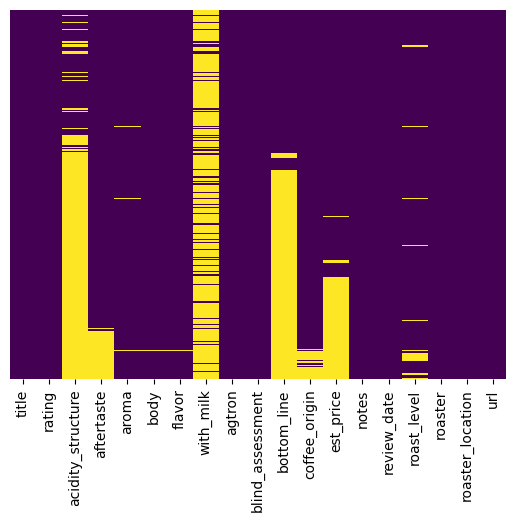

In [5]:
# Let's look at a heatmap of missing values.
sns.heatmap(coffee_df.isnull(),yticklabels=False,cbar=False,cmap='viridis') 
plt.show()
# Yeesh. It might be worth it to remove the 'acidity_structure', 'with_milk', and 'bottom_line' categories.
# I'm not sure what I'll do with 'est_price' yet, but it's missing quite a few, too.
# I wonder if 'est_price', 'coffee_origin', and 'aftertaste' are new categories, because
# it looks like they're missing most of their values at the bottom of the heatmap.


In [17]:
# Now let's see when 'est_price' became a feature, because I'm pretty interested in that one.
est_price_na = coffee_df[coffee_df['est_price'].notnull()]
est_price_na['review_date'].unique()
# Ok, it looks like it became a feature in 2009/2010, but there are still some missing values later.


array(['January 2023', 'December 2022', 'November 2022', 'October 2022',
       'September 2022', 'August 2022', 'July 2022', 'February 2023',
       'June 2022', 'May 2022', 'April 2022', 'March 2022',
       'February 2022', 'January 2022', 'December 2021', 'November 2021',
       'October 2021', 'September 2021', 'August 2021', 'July 2021',
       'June 2021', 'May 2021', 'April 2021', 'March 2021',
       'February 2021', 'January 2021', 'December 2020', 'November 2020',
       'October 2020', 'September 2020', 'August 2020', 'July 2020',
       'June 2020', 'May 2020', 'April 2020', 'March 2020',
       'February 2020', 'December 2019', 'January 2020', 'November 2019',
       'October 2019', 'August 2019', 'July 2019', 'June 2019',
       'May 2019', 'April 2019', 'March 2019', 'February 2019',
       'January 2019', 'December 2018', 'November 2018', 'September 2019',
       'October 2018', 'September 2018', 'August 2018', 'July 2018',
       'June 2018', 'May 2018', 'April 2018',

## Summarize Your Results

With your EDA complete, answer the following questions.

1. Was there anything surprising about your dataset? 

    I was surprised to find that only two columns had numerical data types! I'll have to convert the other rating columns.
    

2. Do you have any concerns about your dataset? 

    Lots of cleaning and manipulation will need to be done.

3. Is there anything you want to make note of for the next phase of your analysis, which is cleaning data? 

    Here's my current data-cleaning checklist:
    -Remove 'acidity-structure', 'with_milk', 'bottom_line', and 'url'
    -Remove 'notes' and 'bottom_line'. I might use 'blind_assessment' to look at some keywords, but that should be sufficient.
    -Recode all ratings to int or float
    -Do further research on agtron, recode it to be more meaningful if we want to keep it.
    -Recode 'est_price' to be consistent. It needs a lot of work!
    -At that point, I'll likely drop any remaining values with missing entries. I don't think I'll want to impute for these values.